In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#plt.style.use('/Users/summer/desktop/notebook.mplstyle');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

In [2]:
def fast_fourier_transform(t,y):
    '''Return the fast Fourier transform of y.'''
    ŷ = np.fft.fft(y)
    ω = 2*np.pi*np.fft.fftfreq(len(time),time[1]-time[0])
    return ω,ŷ

In [4]:
I = 4
J = 8
F = 14

c = 10
b = 10
h = 1

dt = 0.0001
totstep = 1000000

In [5]:
def lorenz96(xy,i,j):

    xy_dot[i] = (xy[0:I][(i-1)%I] * (xy[0:I][(i+1)%I] - xy[0:I][(i-2)%I]) - xy[0:I][i%I] + F - h*c/b*(np.sum([xy[I::][i::I]])))    
    xy_dot[I+j*I+i] = (c*b*xy[I:][((j+1)%J)*I+i]*(xy[I:][((j-1)%J)*I+i]-xy[I:][((j+2)%J)*I+i])-c*xy[I:][((j)%J)*I+i]+h*c/b*xy[0:I][i])

    #dx[i] = (x[(i-1)%I] * (x[(i+1)%I] - x[(i-2)%I]) - x[i%I] + F - h*c/b*(np.sum([y[jj%J,i] for jj in range(J)])))*dt     
    #dy[j,i] = (c*b*y[(j+1)%J,i]*(y[(j-1)%J,i]-y[(j+2)%J,i])-c*y[(j)%J,i]+h*c/b*x[i])*dt
    #print(i,j,xy_dot)

    return xy_dot

In [6]:
def RK4(xylist,step,i,j):
    
    oldxy = xylist[((I+J*I)*(step-1)):((I+J*I)*(step))]

    k1 = dt*lorenz96(oldxy,i,j)
    k2 = dt*lorenz96(oldxy + k1*0.5*dt,i,j)
    k3 = dt*lorenz96(oldxy + k2*0.5*dt,i,j)
    k4 = dt*lorenz96(oldxy + k3*dt,i,j)

    return oldxy + (k1 + 2*k2 + 2*k3 + k4)/6

In [7]:
x = np.random.rand(I)
y = np.random.rand(J,I)
xylist = np.zeros([(totstep)*(I+J*I)])
s=0

print(x)
print()
print(y)
print()

newx=[]
newlist = []
time=[0]

for ii in range(I):
    xylist[ii] = x[ii]
    #newx.append(x[ii])

newx.append([x[ii] for ii in range(len(x))])
print()
print(newx)
print()

for jjj in range(J):
    for iii in range(I):
        xylist[I + jjj*I + iii] = y[jjj,iii]
#print(xylist)

[ 0.85413596  0.84587433  0.21058361  0.91525024]

[[ 0.61077975  0.11032995  0.88737844  0.45632958]
 [ 0.34914782  0.97813141  0.82754621  0.07427103]
 [ 0.0204768   0.18822169  0.71611297  0.6729648 ]
 [ 0.98039836  0.65298806  0.35170609  0.94082527]
 [ 0.8815031   0.59999569  0.81997229  0.14561293]
 [ 0.4971467   0.01373982  0.49268032  0.91994764]
 [ 0.73839476  0.07868296  0.48090776  0.94802654]
 [ 0.66192129  0.65394754  0.26240628  0.85602469]]


[[0.85413595900921468, 0.84587433157976277, 0.21058361428262684, 0.91525023631843572]]



In [8]:
print(xylist)

[ 0.85413596  0.84587433  0.21058361 ...,  0.          0.          0.        ]


In [9]:
for step in np.arange(1,totstep,1):
    
    xy_dot= np.zeros((I+J*I))
    
    for i in range(I):
        
        s+=1
        time.append(s*dt)
        
        for j in range(J):
            
            xylist[(I+J*I)*(step):(I+J*I)*(step+1)] = RK4(xylist,step, i,j)
            
            newlist = xylist[(I+J*I)*(step):(I+J*I)*(step+1)][0:I]

        newx.append([newlist[ij] for ij in range(len(newlist))])
    
#print(xylist[-20::])
#print(time)
#print(len(time))

In [10]:
x1 = np.array([newx[a][0] for a in range(len(newx))])
x2 = np.array([newx[a][1] for a in range(len(newx))])
x3 = np.array([newx[a][2] for a in range(len(newx))])
x4 = np.array([newx[a][3] for a in range(len(newx))])

In [11]:
print(len(x1))

3999997


In [ ]:
np.linspace(0, 10, N, endpoint=True)

In [76]:
print(x2)

[ 0.05184638  0.05184638  0.05288486 ..., -0.11882971 -0.11882971
 -0.11882971]


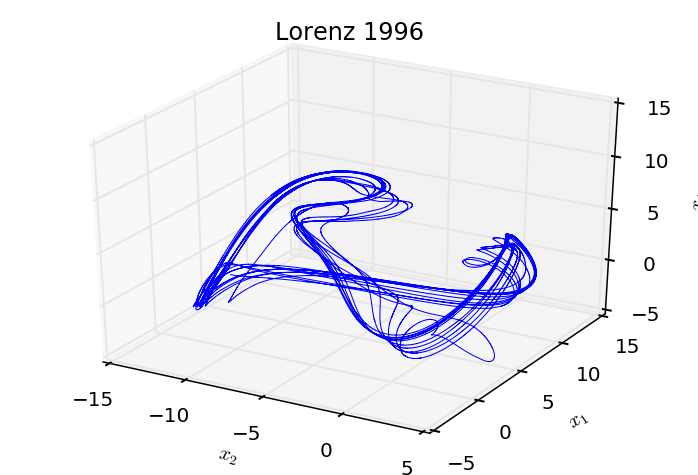

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(-x2[3000000:], x1[3000000:], x3[3000000:],lw=0.5)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_4$")
ax.set_title("Lorenz 1996")
plt.show()

In [ ]:
print(len(time))
print(len(x1))

In [29]:
fig = plt.figure(figsize=(8,5))
plt.scatter(time,x1, s=0.5, marker='.', c='b')
# title and labels
plt.ylabel(r'$x_1$')
plt.xlabel(r'$time$')
plt.title('1996 Lorenz model\n',fontsize=15)
plt.xlim(time[-500000],time[-1])
ax.set_xticklabels([])
#plt.ylim(0,1)
plt.show()

The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.


OSError: [Errno 24] Too many open files: '/Users/summer/anaconda/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/Vera.ttf'

In [27]:
# Get the discrete FT
ω,ŷ = fast_fourier_transform(time,x1)
print(len(time))
# Plot the real and imaginary parts of the DFT
fig = plt.figure(figsize=(8,5))
plt.loglog(ω,ŷ.real,label='real.',lw=1)
plt.loglog(ω,ŷ.imag,label='imag.',lw=1)
#plt.xlim(0,np.max(ω))
#plt.xlim(1,10**5)
#plt.ylim(-100000,100000)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Transform [arb.]')
plt.legend(loc='lower right')

3999997


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10a5d36a8> (for post_execute):


OSError: [Errno 24] Too many open files: '/Users/summer/anaconda/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/Vera.ttf'

OSError: [Errno 24] Too many open files: '/Users/summer/anaconda/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/Vera.ttf'